In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np


In [2]:
data_path = "Dataset/FER2013/train"
EMOTIONS = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]

In [3]:
categories = sorted(os.listdir(data_path))  # Ensure consistent ordering
print("Categories:", categories)

# Map categories to numerical labels
label_map = {category: idx for idx, category in enumerate(categories)}
print("Label Map:", label_map)

images = []
labels = []

for category, label in label_map.items():
    category_path = os.path.join(data_path, category)
    
    # Load all images in the category folder
    for file in os.listdir(category_path):
        file_path = os.path.join(category_path, file)
        image = cv2.imread(file_path)
        images.append(image)
        labels.append(label)

Categories: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
Label Map: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [4]:
df_train = pd.DataFrame({
    'image': [img.tolist() for img in images],
    'emotion': labels
})

In [5]:
df_train.head()

,image,emotion
0,"[[[50, 50, 50], [32, 32, 32], [15, 15, 15], [1...",0
1,"[[[29, 29, 29], [24, 24, 24], [29, 29, 29], [1...",0
2,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0
3,"[[[155, 155, 155], [138, 138, 138], [98, 98, 9...",0
4,"[[[211, 211, 211], [215, 215, 215], [220, 220,...",0


In [6]:
df_train.count()

image      28709
emotion    28709
dtype: int64

In [7]:
#Ensure all images are loaded correctly.
for idx, img in enumerate(images):
    if img is None:
        print(EMOTIONS[labels[idx]])
        print(idx)
        print(labels[idx])
        print(images[idx])
        break

# Distribution of Emotions

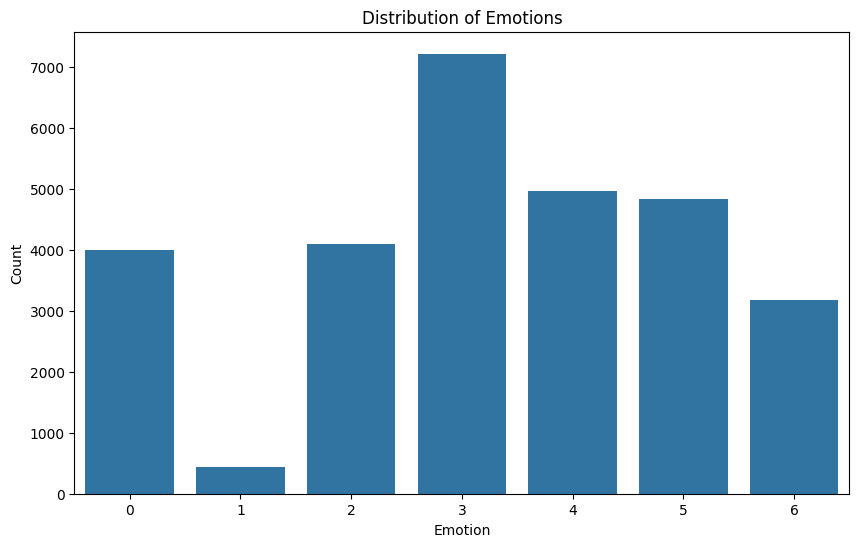

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='emotion', data=df_train)
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

In [9]:
emotion_counts = df_train['emotion'].value_counts()
print(emotion_counts)


emotion
3    7215
4    4965
5    4830
2    4097
0    3995
6    3171
1     436
Name: count, dtype: int64


# Shape of The Images

In [10]:
#check the shape of the images
print(images[0].shape)

(48, 48, 3)


In [11]:
#count number of images that are not of the same shape
count = 0
for img in images:
    if img.shape != (48, 48, 3):
        count += 1
print(count)

0


# Pixel Intensity Distribution

In [12]:
#count number of images that pixel intensity is 0
count = 0
for img in images:
    if np.all(img == 0):
        count += 1
print(count)

11


Angry


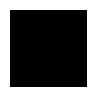

Angry


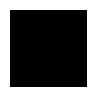

Angry


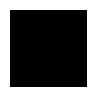

Angry


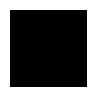

Angry


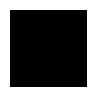

Angry


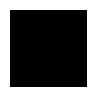

Angry


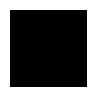

Happy


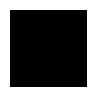

Neutral


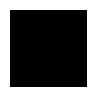

Sad


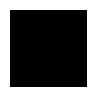

Surprise


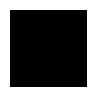

In [13]:
#show the images that pixel intensity is 0
for idx, img in enumerate(images):
    if np.all(img == 0):
        print(EMOTIONS[labels[idx]])
        plt.figure(figsize=(1, 1))
        plt.axis('off')
        plt.imshow(img)
        plt.show()